In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/Dogs_vs_cats_database'

train_dir = os.path.join(base_dir, 'train_dvc')
validation_dir = os.path.join(base_dir, 'validation_dvc')
test_dir = os.path.join(base_dir, 'test/test1')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
# test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 24ms/step


In [ ]:
from keras import models
from keras import layers

In [ ]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape = (4,4,512)))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2097665 (8.00 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hismod2 = model2.fit(train_features, train_labels, epochs=30, batch_size = batch_size, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 7ms/step - loss: 0.6913 - accuracy: 0.7340 - val_loss: 0.3132 - val_accuracy: 0.8840
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3471 - accuracy: 0.8575 - val_loss: 0.3938 - val_accuracy: 0.8330
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.8840 - val_loss: 0.2544 - val_accuracy: 0.9030
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.9055 - val_loss: 0.2681 - val_accuracy: 0.8950
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.9070 - val_loss: 0.3132 - val_accuracy: 0.8820
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.9220 - val_loss: 0.2711 - val_accuracy: 0.9010
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.1726 - accuracy: 0.9345 - val_loss: 0.2635 - val_accuracy: 0.9060
Epoch 

In [ ]:
history_dict = hismod2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

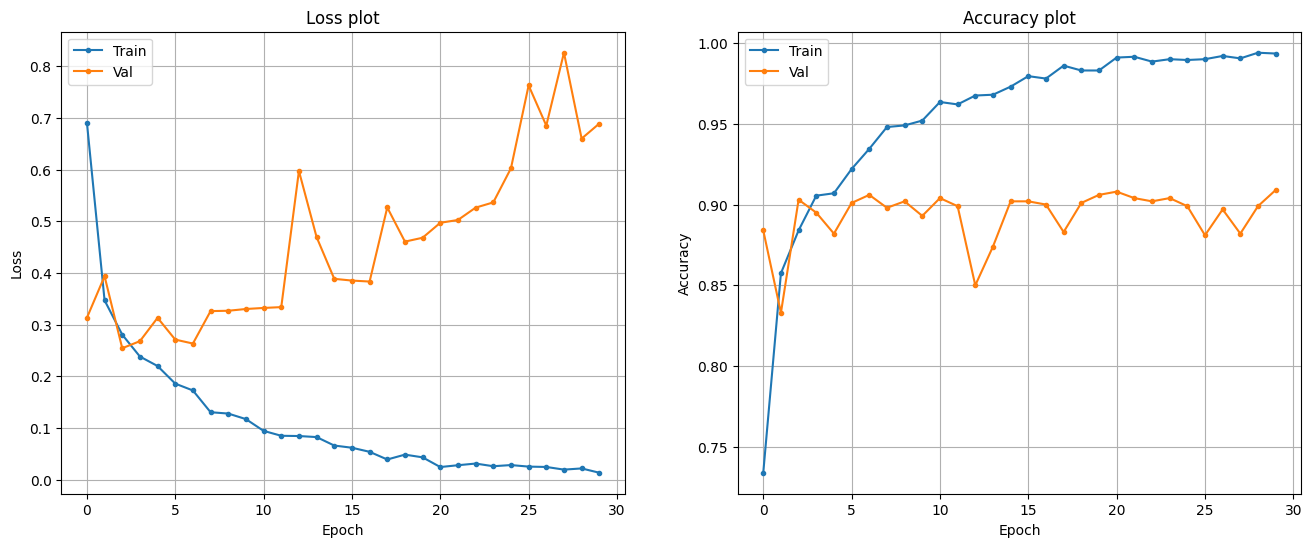

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

cz 2


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-14-574b638773a9>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 - 27s - loss: 0.7699 - acc: 0.7000 - val_loss: 0.3587 - val_acc: 0.8330 - 27s/epoch - 266ms/step
Epoch 2/30
100/100 - 23s - loss: 0.4557 - acc: 0.7805 - val_loss: 0.3173 - val_acc: 0.8530 - 23s/epoch - 230ms/step
Epoch 3/30
100/100 - 23s - loss: 0.4081 - acc: 0.8090 - val_loss: 0.2642 - val_acc: 0.8920 - 23s/epoch - 230ms/step
Epoch 4/30
100/100 - 22s - loss: 0.3891 - acc: 0.8195 - val_loss: 0.3214 - val_acc: 0.8570 - 22s/epoch - 224ms/step
Epoch 5/30
100/100 - 23s - loss: 0.3744 - acc: 0.8285 - val_loss: 0.3403 - val_acc: 0.8460 - 23s/epoch - 227ms/step
Epoch 6/30
100/100 - 24s - loss: 0.3480 - acc: 0.8430 - val_loss: 0.2736 - val_acc: 0.8800 - 24s/epoch - 244ms/step
Epoch 7/30
100/100 - 23s - loss: 0.3449 - acc: 0.8370 - val_loss: 0.4267 - val_acc: 0.8210 - 23s/epoch - 227ms/step
Epoch 8/30
100/100 - 25s - loss: 0.3351 - acc: 0.8585 - val_loss: 0.2573 - val_acc: 0.8920 - 25s/epoch - 248ms/step
Epoch 9/30
100/100 - 23s - loss: 0.3385 - acc: 0.8530 - val_loss: 0.2504

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

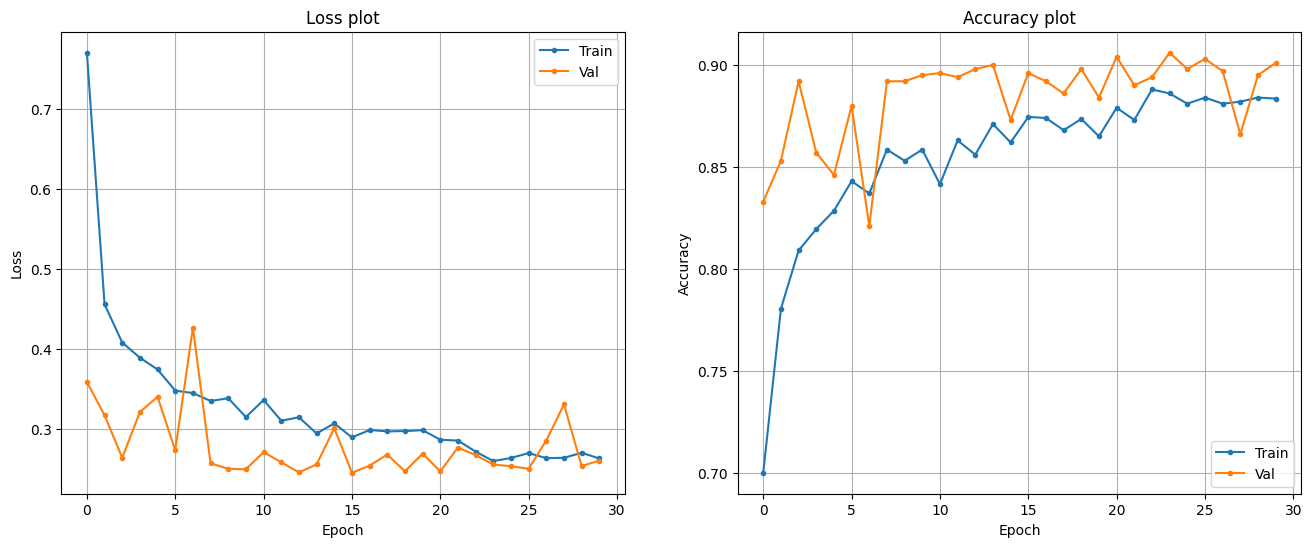

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['acc'],".-")
ax2.plot(history_dict['val_acc'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)